# Linear_algebra

In [2]:
[4, 2, 10.2] # vector

[4, 2, 10.2]

In [3]:
# pip install numpy
import numpy as np
house = np.array([4, 2, 10.2])
print(house)
print(house.shape)

[ 4.   2.  10.2]
(3,)


# Matrices

In [4]:
X = np.array([
    [4, 2],
    [2, 1],
    [10.2, 4]
])                  # representation of metrices using numpy
print(X)
print(X.shape)

[[ 4.   2. ]
 [ 2.   1. ]
 [10.2  4. ]]
(3, 2)


# Matrices operation


In [5]:
# scalar multiplication
alpha = 3
print(alpha * X) #  the * operator will perform an elementwise multiplication, NOT a dot product:

[[12.   6. ]
 [ 6.   3. ]
 [30.6 12. ]]


In [6]:
# scalar multiplication using numpy
X = np.array([
    [4, 2],
    [2, 1],
    [10.2, 4]
]) 
print("X = ",X)
print("Shape of X metrics ---> ",X.shape)

b = np.array([1, 1, 0.4])
print("b =",b)
print("Shape of b vector --->",b.shape)

X =  [[ 4.   2. ]
 [ 2.   1. ]
 [10.2  4. ]]
Shape of X metrics --->  (3, 2)
b = [1.  1.  0.4]
Shape of b vector ---> (3,)


# Dot product

In [7]:
print("Dot product using 'np.dot' --->",np.dot(X.T, b)) #

print("Dot product using '.dot' --->",X.T.dot(b))

print("Dot product using '@' --->",X.T @ b)
print((X.T @ b).shape)  #if our actual y is (2, ), then we let w to be (n_features, )

Dot product using 'np.dot' ---> [10.08  4.6 ]
Dot product using '.dot' ---> [10.08  4.6 ]
Dot product using '@' ---> [10.08  4.6 ]
(2,)


In [8]:
# Let's say I have x3 like this. I can use my beta to predict the price
x3 = np.array([3, 2, 15])

print(x3.T @ b)
print((x3.T @ b).shape)

## Q @ R --> Q.__matmul__(R) equivalent to  NumPy as np.matmul(Q, R), not as Q.dot(R)
## Difference is that matmul does not support scalar multiplication, 
# while dot does, so you can write Q.dot(3), which is equivalent to Q * 3, but you cannot write Q @ 

11.0
()


# vectors as arrows


## 2d vectors


In [9]:
u = np.array([2, 5])
v = np.array([3, 1])
zipped = zip(u, v)

zipped_list = list(zipped)
print(zipped_list)

[(np.int64(2), np.int64(3)), (np.int64(5), np.int64(1))]


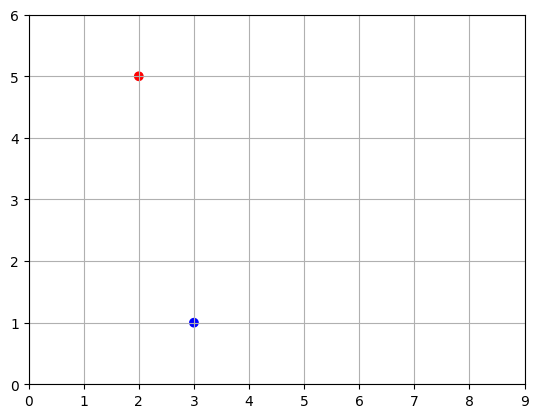

In [12]:
import matplotlib.pyplot as plt

u = np.array([2, 5])
v = np.array([3, 1])

x_coords, y_coords = zip(u, v) # why is zip? to make above as (2,3) and (5, 1)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

# norm

In [13]:
def vector_norm(vector):
    squares = [element**2 for element in vector] # List comprehension used for (2)^2 + (5)^2 = 29 
    return sum(squares)**0.5

print(f"|| {u} || =", vector_norm(u)) 

|| [2 5] || = 5.385164807134504


In [14]:
# More efficient to use Numpy's linalg

import numpy.linalg as LA
LA.norm(u)

np.float64(5.385164807134504)

# Addition vector

In [15]:
print(" ", u)
print("+", v)
print("-"*10)
u + v


  [2 5]
+ [3 1]
----------


array([5, 6])

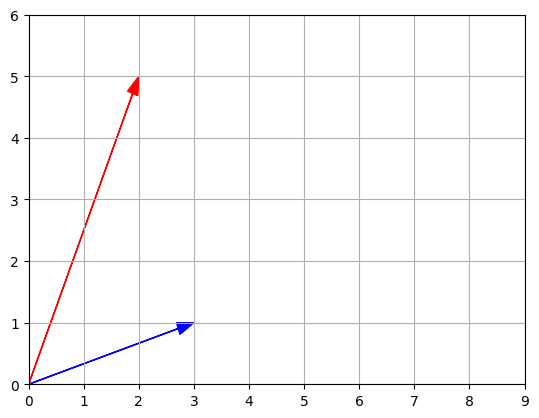

In [16]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6]) # Xaxis = (0, 9) and Y axis = (0, 6)
plt.grid()
plt.show()

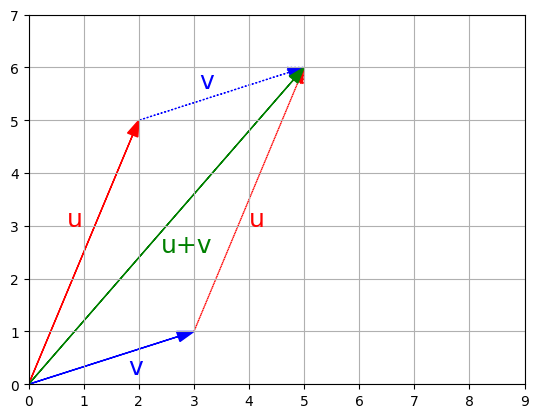

In [17]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

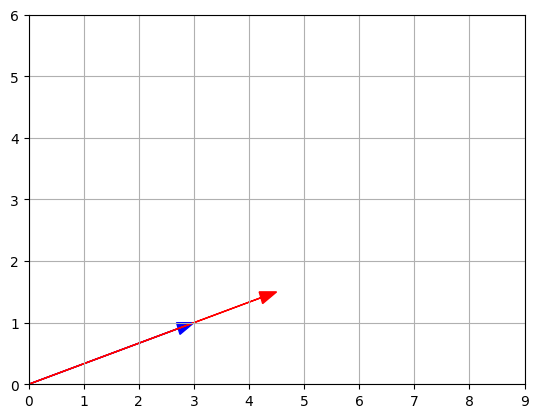

In [18]:
plot_vector2d(v, color="b")
plot_vector2d(1.5*v, color="r")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

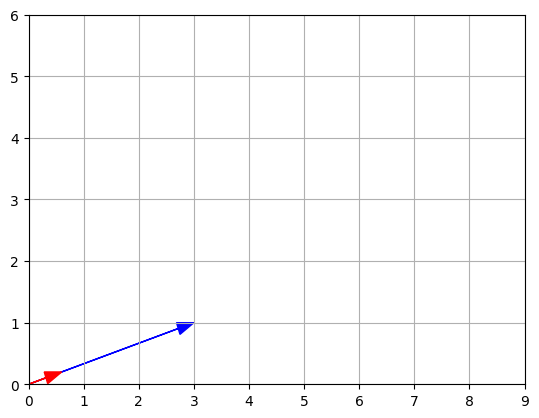

In [19]:
# the vector smaller? Simply division. Recall that division is the same as multiplication with something less than 1

plot_vector2d(v, color="b")
plot_vector2d(0.2*v, color="r")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

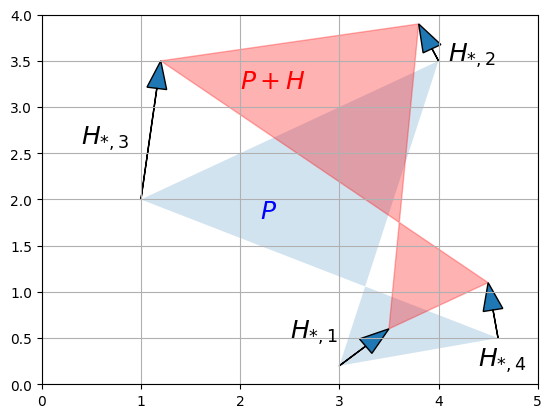

In [20]:
from matplotlib.patches import Polygon

P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])

H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

#matplotlib's `Polygon` class expects an $n \times 2$ NumPy array, 
#not a $2 \times n$ array, so we just need to give it $P^T$:
plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()


In [21]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

In [22]:
# A matrix to the diag function, it will happily extract the diagonal values:
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
np.diag(D)

array([1, 5, 9])

In [23]:
#  identity matrix
np.eye(3) # 

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# Inverse Metrics

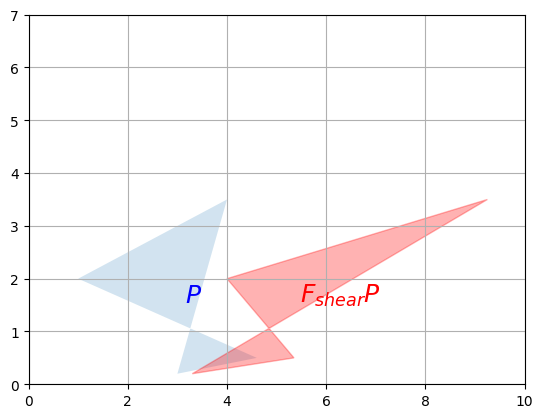

In [24]:
# share 
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])

def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()
    
plot_transformation(P, F_shear.dot(P), "$P$", "$F_{shear} P$",
                    axis=[0, 10, 0, 7])
plt.show()

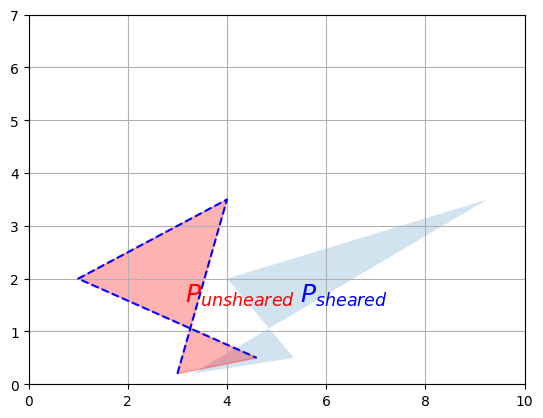

In [25]:
F_inv_shear = LA.inv(F_shear)
P_sheared = F_shear.dot(P)
P_unsheared = F_inv_shear.dot(P_sheared)
plot_transformation(P_sheared, P_unsheared, "$P_{sheared}$", "$P_{unsheared}$",
                    axis=[0, 10, 0, 7])
plt.plot(P[0], P[1], "b--")
plt.show()

# Determinant

In [26]:
# Determinant 
M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
LA.det(M)

np.float64(27.0)

In [27]:
LA.det(F_shear)

np.float64(1.0)

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ritik\AppData\Local\Temp\ipykernel_7872\45773321.py:9: SyntaxWarning: invalid escape sequence '\c'
  plot_transformation(P, F_scale.dot(P), "$P$", "$F_{scale} \cdot P$",


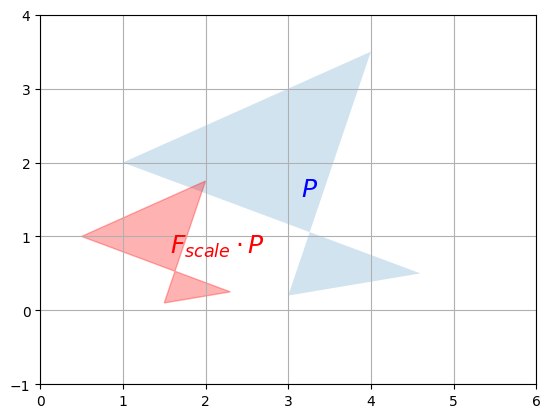

In [28]:
## Determinant can be used to measure how linear trasformation effect the surface area
## In share no surface area is change so the detereminant is 1 same for the rotating as well
## BUt not for the scaling matrix

F_scale = np.array([
        [0.5, 0],
        [0, 0.5]
    ])
plot_transformation(P, F_scale.dot(P), "$P$", "$F_{scale} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

In [29]:
LA.det(F_scale)

np.float64(0.25)

# Eigenvectors and eigenvalues

In [30]:
import numpy as np

# Define the matrix
A = np.array([[2, 1],
              [1, 2]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Print the results
print("Matrix A:")
print(A)
print("\nEigenvalue (first):")
print(eigenvalues[0])
print("\nCorresponding Eigenvector:")
print(eigenvectors[:, 0])

Matrix A:
[[2 1]
 [1 2]]

Eigenvalue (first):
3.0

Corresponding Eigenvector:
[0.70710678 0.70710678]
